In [ ]:
import pandas as pd
import datetime as dt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import adfuller, pacf, acf
from statsmodels.tsa.seasonal import seasonal_decompose


# **Preprocessing Weather Data**





In [ ]:
df1 = pd.read_csv('/content/weather_data.csv')

In [ ]:
df1

,station,valid,temperature,dew_point_temp,relative_humidity,wind_speed
0,DFW,1/1/2001 0:53,26.1,25.0,95.53,9.20
1,DFW,1/1/2001 1:53,26.1,25.0,95.53,6.90
2,DFW,1/1/2001 2:53,27.0,25.0,92.05,5.75
3,DFW,1/1/2001 3:53,26.1,25.0,95.53,4.60
4,DFW,1/1/2001 4:53,26.1,25.0,95.53,5.75
...,...,...,...,...,...,...
206819,DFW,8/30/2024 19:53,91.0,71.0,52.07,9.20
206820,DFW,8/30/2024 20:53,89.0,70.0,53.59,9.20
206821,DFW,8/30/2024 21:53,91.0,70.0,50.33,10.35
206822,DFW,8/30/2024 22:53,89.0,70.0,53.59,9.20


In [ ]:
df1.dtypes

,0
station,object
valid,object
temperature,float64
dew_point_temp,float64
relative_humidity,float64
wind_speed,float64


In [ ]:
df1 = df1.drop('station', axis = 1)

In [ ]:
df1.dropna()

,valid,temperature,dew_point_temp,relative_humidity,wind_speed
0,1/1/2001 0:53,26.1,25.0,95.53,9.20
1,1/1/2001 1:53,26.1,25.0,95.53,6.90
2,1/1/2001 2:53,27.0,25.0,92.05,5.75
3,1/1/2001 3:53,26.1,25.0,95.53,4.60
4,1/1/2001 4:53,26.1,25.0,95.53,5.75
...,...,...,...,...,...
206819,8/30/2024 19:53,91.0,71.0,52.07,9.20
206820,8/30/2024 20:53,89.0,70.0,53.59,9.20
206821,8/30/2024 21:53,91.0,70.0,50.33,10.35
206822,8/30/2024 22:53,89.0,70.0,53.59,9.20


In [ ]:
df1


,valid,temperature,dew_point_temp,relative_humidity,wind_speed
0,1/1/2001 0:53,26.1,25.0,95.53,9.20
1,1/1/2001 1:53,26.1,25.0,95.53,6.90
2,1/1/2001 2:53,27.0,25.0,92.05,5.75
3,1/1/2001 3:53,26.1,25.0,95.53,4.60
4,1/1/2001 4:53,26.1,25.0,95.53,5.75
...,...,...,...,...,...
206819,8/30/2024 19:53,91.0,71.0,52.07,9.20
206820,8/30/2024 20:53,89.0,70.0,53.59,9.20
206821,8/30/2024 21:53,91.0,70.0,50.33,10.35
206822,8/30/2024 22:53,89.0,70.0,53.59,9.20


In [ ]:
df1['valid'] = pd.to_datetime(df1['valid'], format='%m/%d/%Y %H:%M')

In [ ]:
df1.dtypes

,0
valid,datetime64[ns]
temperature,float64
dew_point_temp,float64
relative_humidity,float64
wind_speed,float64


In [ ]:
df1.set_index('valid', inplace=True)

In [ ]:
df1 = df1.resample('ME').mean()

In [ ]:
df1

,temperature,dew_point_temp,relative_humidity,wind_speed
valid,,,,
2001-01-31,42.190726,35.136290,78.836720,9.096438
2001-02-28,49.616939,42.020505,78.083224,11.216791
2001-03-31,51.574697,43.343203,75.897429,8.918304
2001-04-30,68.038889,56.945833,69.980333,12.198398
2001-05-31,74.154987,63.415094,71.371119,11.163679
...,...,...,...,...
2024-04-30,68.681250,56.426389,68.500514,12.483889
2024-05-31,76.885753,66.099462,71.643253,10.615860
2024-06-30,83.967500,70.156944,65.470833,9.933125


In [ ]:
df1.index= df1.index.strftime('%m - %y')


In [ ]:
df1


,temperature,dew_point_temp,relative_humidity,wind_speed
valid,,,,
01 - 01,42.190726,35.136290,78.836720,9.096438
02 - 01,49.616939,42.020505,78.083224,11.216791
03 - 01,51.574697,43.343203,75.897429,8.918304
04 - 01,68.038889,56.945833,69.980333,12.198398
05 - 01,74.154987,63.415094,71.371119,11.163679
...,...,...,...,...
04 - 24,68.681250,56.426389,68.500514,12.483889
05 - 24,76.885753,66.099462,71.643253,10.615860
06 - 24,83.967500,70.156944,65.470833,9.933125


# **Preprocessing Electricity Generation Data**

In [ ]:
df2 = pd.read_csv("/content/electric_data.csv")

In [ ]:
df2.dtypes

,0
Timestamp,object
Generation(megawatthrs),float64


In [ ]:
df2


,Timestamp,Generation(megawatthrs)
0,Jan-01,22450.33300
1,Feb-01,18357.42100
2,Mar-01,19481.59100
3,Apr-01,20094.17500
4,May-01,23729.52600
...,...,...
279,Apr-24,5305.85996
280,May-24,7725.75821
281,Jun-24,8788.78330
282,Jul-24,9609.18538


In [ ]:
df2['Timestamp'] = pd.to_datetime(df2['Timestamp'], format='%b-%y', errors='coerce')

In [ ]:
df2.dtypes

,0
Timestamp,datetime64[ns]
Generation(megawatthrs),float64


In [ ]:
df2.set_index('Timestamp', inplace=True)

In [ ]:
df2.index= df2.index.strftime('%m - %y')


In [ ]:
df2

,Generation(megawatthrs)
Timestamp,
01 - 01,22450.33300
02 - 01,18357.42100
03 - 01,19481.59100
04 - 01,20094.17500
05 - 01,23729.52600
...,...
04 - 24,5305.85996
05 - 24,7725.75821
06 - 24,8788.78330


# **Merging both the Datasets**

In [ ]:
df = df1.join(df2, how = 'inner')

In [ ]:
df.head()

,temperature,dew_point_temp,relative_humidity,wind_speed,Generation(megawatthrs)
01 - 01,42.190726,35.136290,78.836720,9.096438,22450.333
02 - 01,49.616939,42.020505,78.083224,11.216791,18357.421
03 - 01,51.574697,43.343203,75.897429,8.918304,19481.591
04 - 01,68.038889,56.945833,69.980333,12.198398,20094.175
05 - 01,74.154987,63.415094,71.371119,11.163679,23729.526


In [ ]:
df.index.name = 'date'  # name the index column
df.to_csv('output.csv', index=True, date_format='%m-%Y')


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

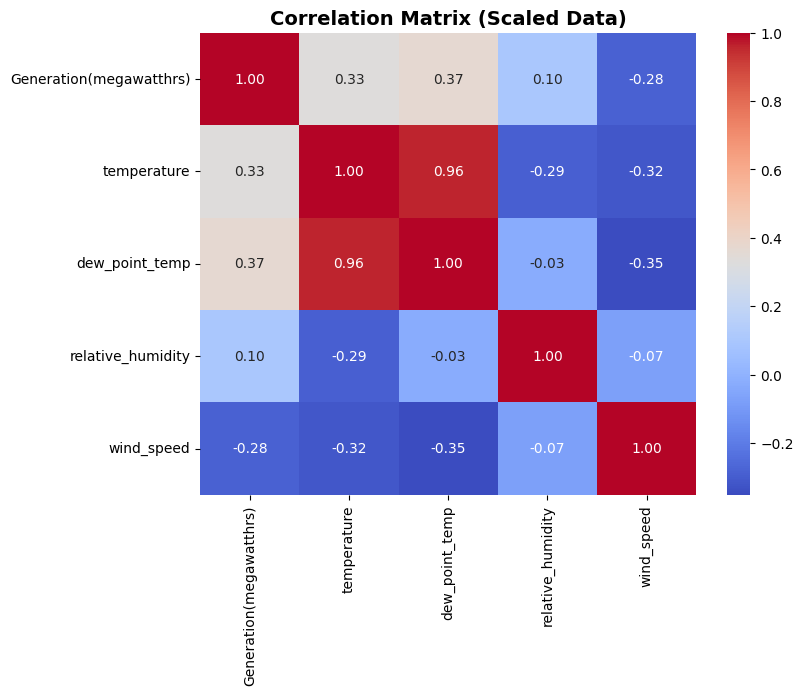

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numeric columns for scaling (example)
cols_to_scale = ['Generation(megawatthrs)', 'temperature', 'dew_point_temp', 'relative_humidity', 'wind_speed']

# Scale the selected columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[cols_to_scale])

# Convert back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=cols_to_scale, index=df.index)

# Compute and plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(scaled_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Scaled Data)', fontsize=14, fontweight='bold')
plt.show()


In [ ]:
df.dtypes

,0
temperature,float64
dew_point_temp,float64
relative_humidity,float64
wind_speed,float64
Generation(megawatthrs),float64


In [ ]:
#Handling missing values
df.isna().sum()

,0
temperature,0
dew_point_temp,0
relative_humidity,0
wind_speed,0
Generation(megawatthrs),0


In [ ]:
df_concat = pd.merge(df1, df2,left_index=True, right_index=True ,how='outer')

In [ ]:
df_concat

,temperature,dew_point_temp,relative_humidity,wind_speed,Generation(megawatthrs)
01 - 01,42.190726,35.136290,78.836720,9.096438,22450.33300
01 - 02,47.476671,33.956044,63.364025,10.968145,12160.43300
01 - 03,43.511532,31.821075,66.814610,10.583715,7344.03200
01 - 04,48.313172,38.100806,70.186102,10.373185,7232.00250
01 - 05,49.228629,38.551075,69.540108,10.223253,7946.54970
...,...,...,...,...,...
12 - 19,49.879812,36.434051,63.291063,9.142732,5619.34444
12 - 20,49.026819,34.891914,63.099933,10.315672,5961.48656
12 - 21,60.635262,47.705114,65.861669,10.587129,4557.82688
12 - 22,50.109838,36.719003,63.399677,9.815296,7080.10587


In [ ]:
df_concat.index = pd.to_datetime(df_concat.index).apply(lambda x: x.strftime('%m - %y'))


<ipython-input-30-a25c10b65870>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_concat.index = pd.to_datetime(df_concat.index).apply(lambda x: x.strftime('%m - %y'))


OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 01 - 01, at position 0

In [ ]:
df_concat.index

# **Exploratory Data Analysis**

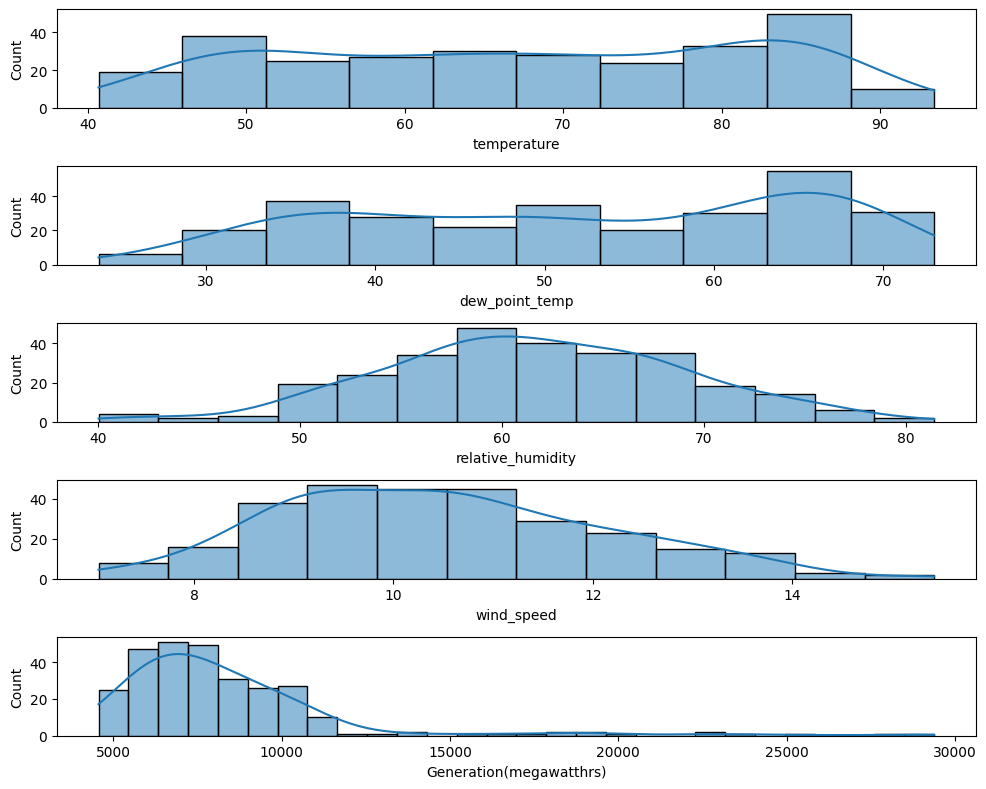

In [ ]:
#Checking the distributions for each variable
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(data=df, x=col, ax=axes[i], kde=True)

plt.tight_layout()
plt.show()


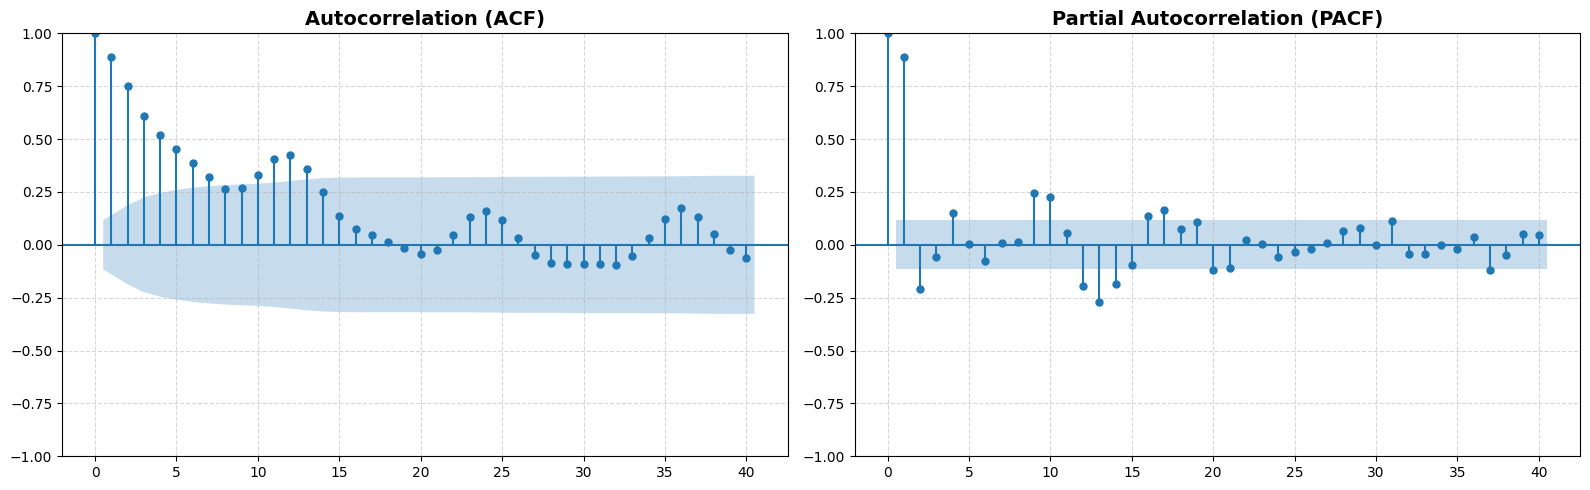

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Set up side-by-side ACF and PACF plots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Autocorrelation Plot
plot_acf(df['Generation(megawatthrs)'], lags=40, alpha=0.05, ax=axes[0])
axes[0].set_title('Autocorrelation (ACF)', fontsize=14, fontweight='bold')
axes[0].grid(True, linestyle='--', alpha=0.5)

# Partial Autocorrelation Plot
plot_pacf(df['Generation(megawatthrs)'], lags=40, alpha=0.05, ax=axes[1], method='ywm')
axes[1].set_title('Partial Autocorrelation (PACF)', fontsize=14, fontweight='bold')
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Number of columns to display side by side
num_columns = 2  # Adjust based on your preference

# Calculate the number of rows needed
num_rows = (len(df.columns) + num_columns - 1) // num_columns

# Create subplots with shared x-axes
fig = make_subplots(
    rows=num_rows,
    cols=num_columns,
    shared_xaxes=True,
    horizontal_spacing=0.1,
    vertical_spacing=0.2,
)

# Add each column to the subplots
for idx, column in enumerate(df.columns):
    row = (idx // num_columns) + 1
    col = (idx % num_columns) + 1
    fig.add_trace(
        go.Scatter(
            x=df.index,  # Assuming time series index
            y=df[column],
            mode='lines',
            name=column,
            line=dict(width=2),
        ),
        row=row, col=col
    )
    # Set subplot title
    fig.update_xaxes(title_text="Time", row=row, col=col)
    fig.update_yaxes(title_text=column, row=row, col=col)

# Update layout for aesthetics
fig.update_layout(
    title="Time Series Plots for All Features (Side by Side)",
    title_x=0.5,
    height=400 * num_rows,  # Adjust height dynamically based on rows
    width=800 * num_columns,  # Adjust width dynamically based on columns
    template="plotly_white",
    showlegend=False,  # Each subplot has its own title
)

# Show the interactive plot
fig.show()


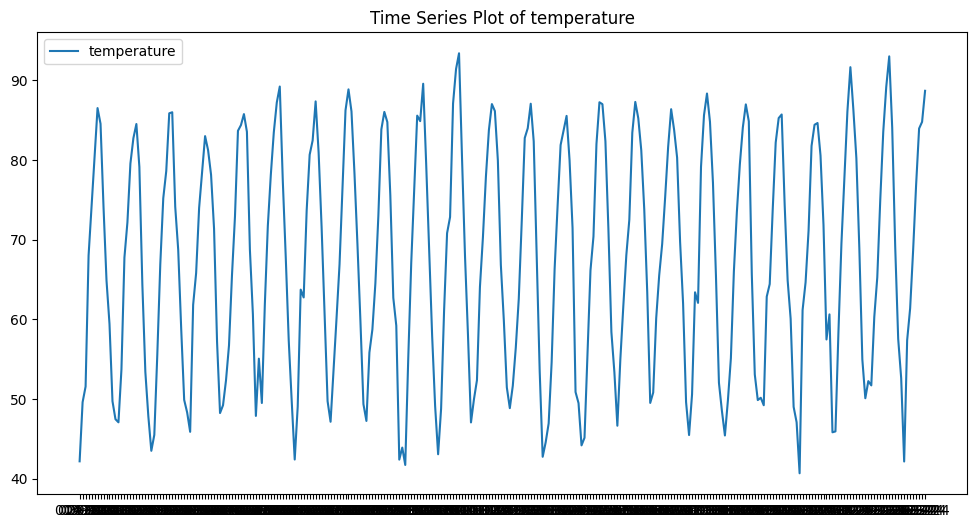

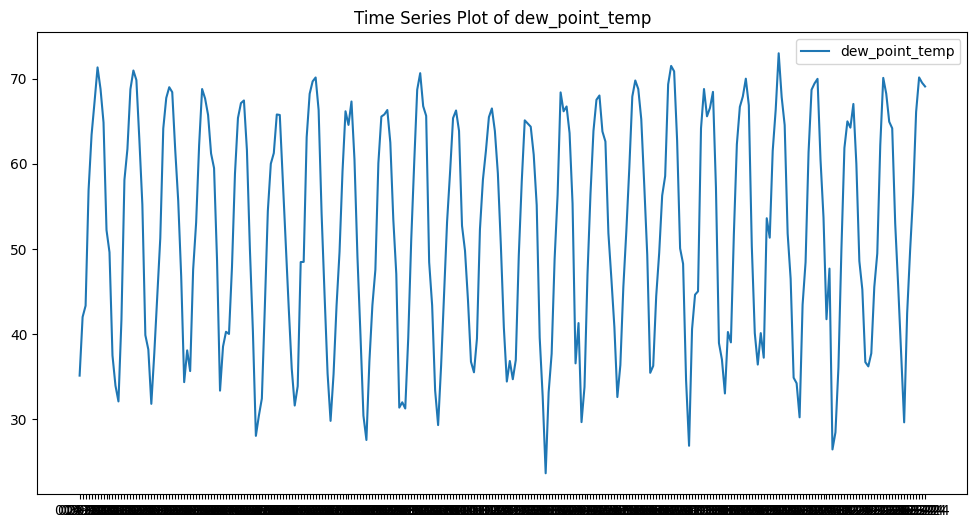

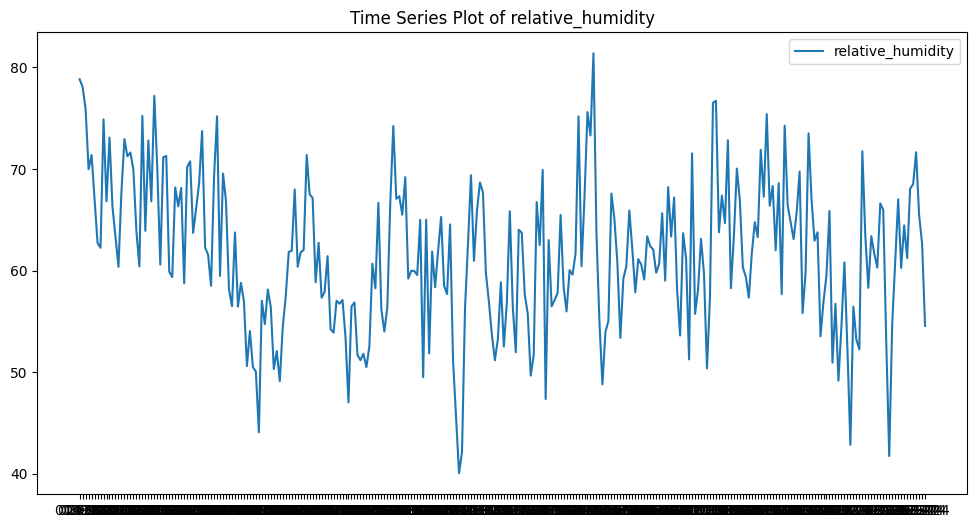

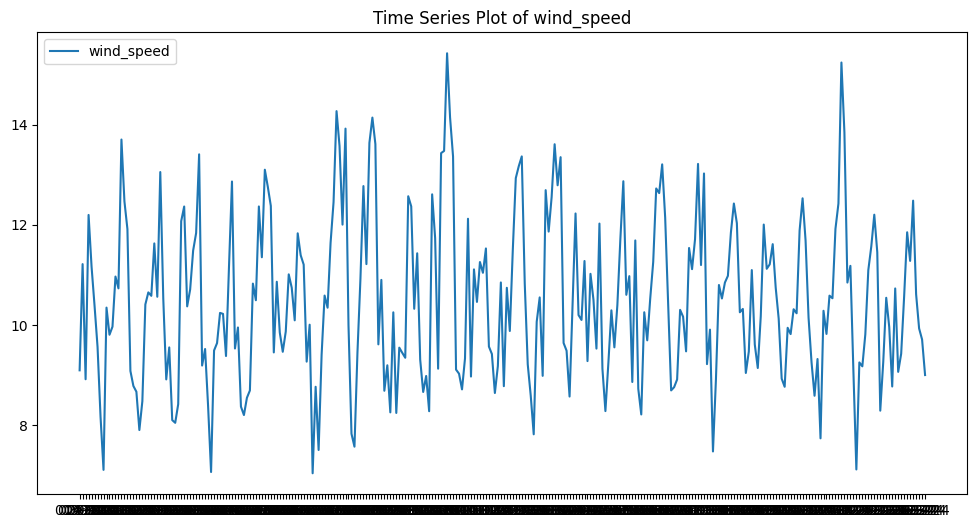

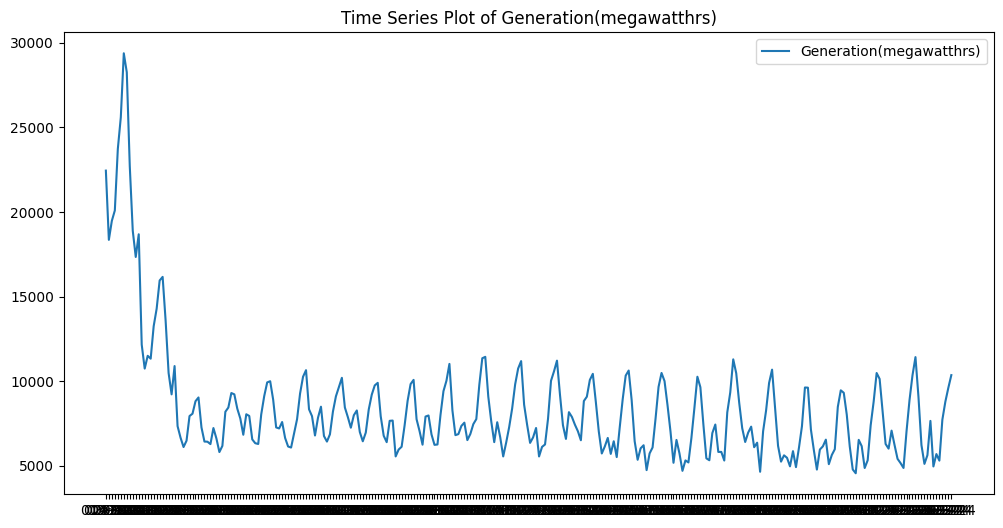

In [ ]:
for column in df.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(df[column], label=column)
    plt.title(f"Time Series Plot of {column}")
    plt.legend()
    plt.show()

In [ ]:
#Checking stationarity of a MTS
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] <= 0.05:
        print("Series is stationary")
    else:
        print("Series is non-stationary")

# Apply ADF test for each variable
for column in df.columns:
    print(f"\n{column}")
    adf_test(df[column])


In [ ]:
#Checking stationarity of a MTS
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] <= 0.05:
        print("Series is stationary")
    else:
        print("Series is non-stationary")

# Apply ADF test for each variable
for column in df.columns:
    print(f"\n{column}")
    adf_test(df[column])

In [ ]:
df

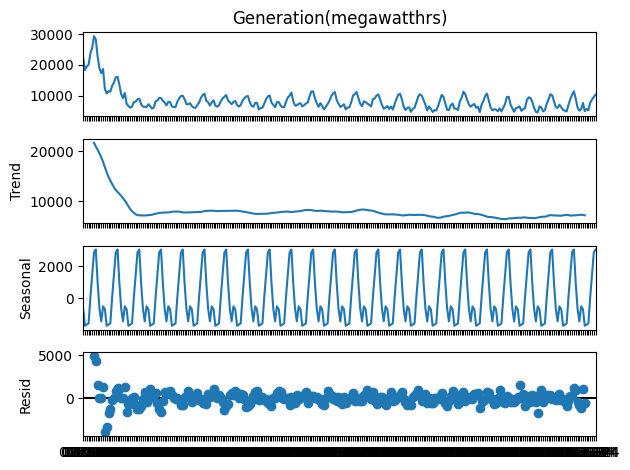

In [ ]:
result = seasonal_decompose(df['Generation(megawatthrs)'], model="additive", period=12)
result.plot()
plt.show()

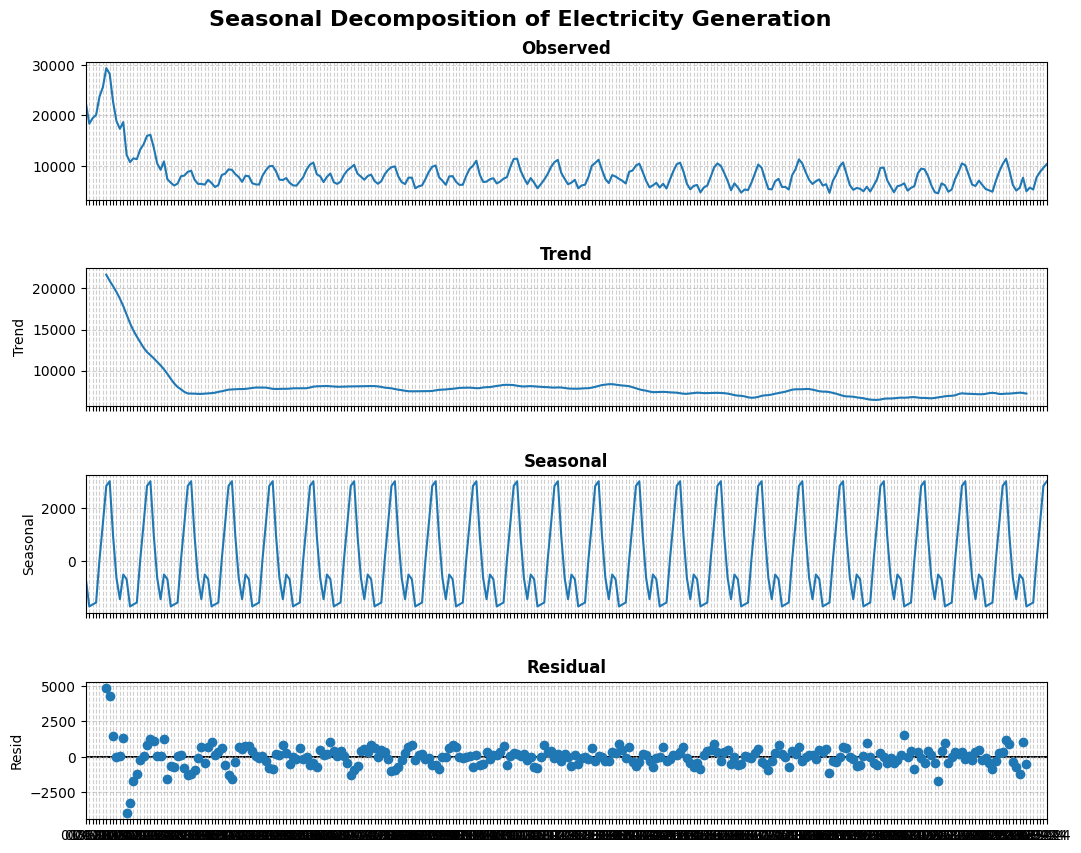

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Generation(megawatthrs)'], model="additive", period=12)

# Plot with aesthetic enhancements
fig = result.plot()
fig.set_size_inches(12, 9)  # Set figure size
fig.suptitle('Seasonal Decomposition of Electricity Generation', fontsize=16, fontweight='bold')

# Adjust subplots
plt.subplots_adjust(hspace=0.5)

# Customize each axis title
for ax, title in zip(fig.axes, ['Observed', 'Trend', 'Seasonal', 'Residual']):
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.grid(True, linestyle='--', alpha=0.6)

plt.show()


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

for column in df.columns:
    plt.figure(figsize=(10, 6))
    plot_acf(df[column].dropna(), lags=30)
    plt.title(f"Autocorrelation of {column}")
    plt.show()

    plt.figure(figsize=(10, 6))
    plot_pacf(df[column].dropna(), lags=30)
    plt.title(f"Partial Autocorrelation of {column}")
    plt.show()

In [ ]:
df

In [ ]:
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] <= 0.05:
        print("Series is stationary")
    else:
        print("Series is non-stationary")

# Apply ADF test for each variable
for column in df.columns:
    print(f"\n{column}")
    adf_test(df[column])


In [ ]:
df

In [ ]:
corr = df.corr()

In [ ]:
# Plot the Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
df

In [ ]:
df_concat["temp_diff"] = df_concat["temperature"].diff()


In [ ]:
df_concat

In [ ]:
df_diff = df_concat.drop("temperature", axis = 1)

In [ ]:
df_diff

In [ ]:
df_diff.dropna(inplace=True)

In [ ]:
df_diff


# Forecasting


**Vector Auto Regression**

In [ ]:
import tensorflow as tf
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
import os


In [ ]:
train = df_diff[:-12]
test = df_diff[-12:]


In [ ]:
for i in range(1,13):
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

In [ ]:
result = model.fit(10)
result.summary()

In [ ]:
pred = result.forecast(y=train.values, steps=12)


In [ ]:
test

In [ ]:
idx = pd.date_range('2015-01-01', periods=12, freq='MS')
df_forecast=pd.DataFrame(data=pred, index=idx, columns=test.columns)

In [ ]:
df_forecast

In [ ]:
df_forecast['temp_diff'] = (df_concat['temp_diff'].iloc[-13]-df['temp_diff'].iloc[-14]) + df_forecast['temp_diff'].cumsum()


In [ ]:
df_forecast

In [ ]:
print(train)

In [ ]:
# Initialize and fit the VAR model
model = VAR(train)
results = model.fit(maxlags=12)

In [ ]:
# Print Summary
print(results.summary())

In [ ]:
print(test.index)

In [ ]:
print(train.values)

In [ ]:
# Step 3: Forecast
forecast_steps = 12  # Forecasting 12 months
forecast = results.forecast(y=train.values, steps=forecast_steps)

In [ ]:
# Convert forecast to DataFrame
forecast_df = pd.DataFrame(forecast, columns=df.columns, index=test.index)

In [ ]:
forecast_df

In [ ]:
energy_forecast = forecast_df["Generation(megawatthrs)"]


In [ ]:
# Step 4: Evaluate (Compare Forecast with Test Data)
print("Forecasted Values:\n", forecast_df['Generation(megawatthrs)'])
print("Actual Values:\n", test['Generation(megawatthrs)'])

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(test['Generation(megawatthrs)'], label="Actual Energy Generation", marker="o")
plt.plot(energy_forecast, label="Forecasted Energy Generation", linestyle="--")
plt.legend()
plt.title("Actual vs Forecasted Energy Generation")
plt.xlabel("Time")
plt.ylabel("Energy Generation")
plt.show()

In [ ]:
mape_score = mean_absolute_percentage_error(np.array(test['Generation(megawatthrs)']), np.array(energy_forecast))
print(f"MAPE: {mape_score:.2f}")

**LSTM**

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd


In [ ]:
cols = list(df)[0:5]

In [ ]:
df_train = df[cols].astype(float)

In [ ]:
df_train

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(df_train)
df_train_scaled = scaler.fit_transform(df_train)

In [ ]:
trainX = []
trainY = []

In [ ]:
# Our goal is to make the data supervised in some manner. Thats why getting the data into the right format is very essential.
n_future = 1 #Predict 1 month in the future
n_past = 12 #Predict 1 month in the future using the past 3 months data


In [ ]:
df_train_scaled

In [ ]:
for i in range(n_past, len(df_train_scaled) - n_future + 1):
  trainX.append(df_train_scaled[i - n_past:i, 0:df_train_scaled.shape[1]])
  trainY.append(df_train_scaled[i + n_future - 1:i + n_future,4])

In [ ]:
trainX, trainY = np.array(trainX), np.array(trainY)
trainX.shape, trainY.shape

In [ ]:
print(trainX)

In [ ]:
trainY.shape

In [ ]:
from keras.callbacks import LearningRateScheduler
from keras.constraints import max_norm
from sklearn.model_selection import GridSearchCV

In [ ]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

In [ ]:
model.compile(optimizer='adam', loss='mse')
model.summary()


In [ ]:
history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1)


In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
n_future = 12

# XGBoost


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df

In [ ]:
# Target: Net Electric Generation
target_col = 'Generation(megawatthrs)'

# Lag features (previous values of target)
for lag in range(1, 8):
    df[f'{target_col}_lag{lag}'] = df[target_col].shift(lag)

# Rolling statistics
df[f'{target_col}_rolling_mean_3'] = df[target_col].rolling(window=3).mean()
df[f'{target_col}_rolling_std_3'] = df[target_col].rolling(window=3).std()

# Date/time-based features
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
df['month'] = df.index.month

# Drop rows with NaNs from lag/rolling features
df.dropna(inplace=True)


In [ ]:
features = [col for col in df.columns if col != target_col]
X = df[features]
y = df[target_col]

# Time-based train-test split
split_idx = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]



In [ ]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
model = xgb.XGBRegressor(objective='reg:squarederror', seed=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Baseline MAPE: {mape:.4f}")


In [ ]:

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3],
    'gamma': [0, 1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
}

tscv = TimeSeriesSplit(n_splits=5)
grid_search = GridSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror', seed=42),
    param_grid=param_grid,
    scoring='neg_mean_absolute_percentage_error',
    cv=tscv,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)
print("Best params:", grid_search.best_params_)

best_model = grid_search.best_estimator_


In [ ]:
final_preds = best_model.predict(X_test_scaled)
final_mape = mean_absolute_percentage_error(y_test, final_preds)
print(f"Final MAPE: {final_mape:.4f}")


In [ ]:
xgb.plot_importance(best_model, max_num_features=10)
plt.title("Top 10 Important Features")
plt.show()
